# Тема 1. Моделирование геометрической вероятности
## Задание
Смоделируйте вычисление геометрической вероятности (на примере из лекции про метание дротиков в игровой круг, площадь которого в два раза меньше площали стены). Показать теоретический расчёт и графическую иллюстрацию для рассматриваемого примера.

## Метод Монте-Карло для оценки числа $\pi$
Имеются две фигуры:
- Квадрат со стороной $2R$ (т.е. площадь этого квадрата $S_{квадрата}=4R^2$)
- Круг с радиусом $R$, вписанный в квадрат ($S_{круга}=\pi R^2$)

Можно сделать вывод, что вероятность попадания случайной точки в круг равна отношению площади круга к площади квадрата, иначе говоря, рассмотрим событие А - случайная точка попала в круг, тогда:
$$P(A) = \frac{\pi R^2}{4R^2}=\frac{\pi}{4}$$

In [1]:
# Импортируем библиотеки
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [8]:
# Константа с количеством точек
NUM_POINTS = 10_000

In [3]:
# Функция для моделирования определённого числа точек
def simulate_points(num_points):
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)

    dist = np.sqrt(x ** 2 + y ** 2)
    inside_circle = dist <= 1

    return x, y, inside_circle

Точек в круге: 7849
Всего точек: 10000
Вероятность попадания: 0.7849
Стремится к π/4 = 0.7854
Оценка π: 3.1396
Точное значение π: 3.1416
Погрешность: 0.0020


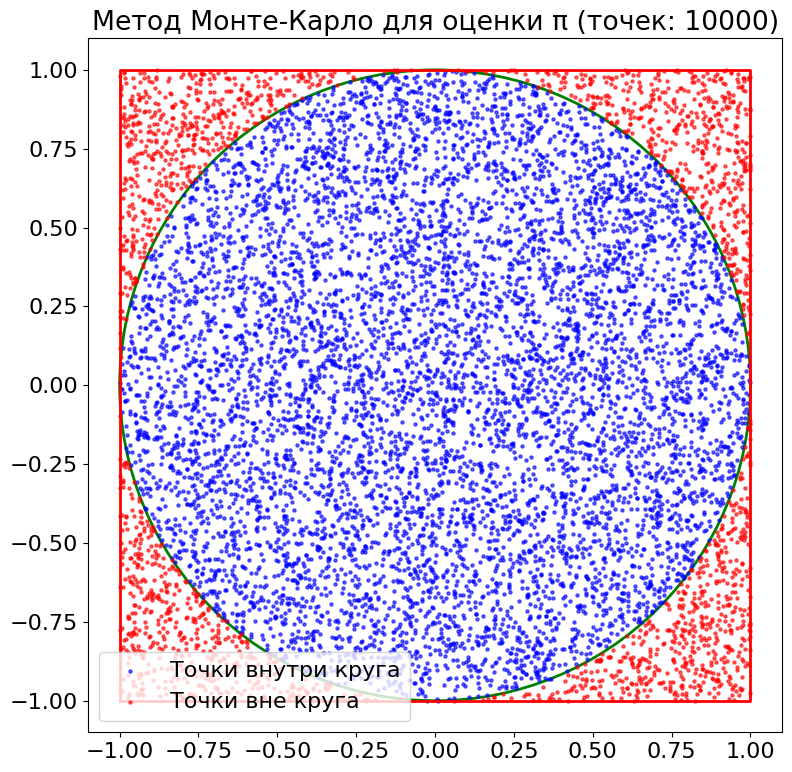

In [9]:
# Создание графика
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 16})

# Генерируем точки
x, y, inside_circle = simulate_points(NUM_POINTS)

# Рисуем квадрат
plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'r-', linewidth=2)

# Рисуем круг
circle = Circle((0, 0), 1, fill=False, color='green', linewidth=2)
plt.gca().add_patch(circle)

# Отображаем точки
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=5, alpha=0.6, label='Точки внутри круга')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=5, alpha=0.6, label='Точки вне круга')

# Настройки графика
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.title(f'Метод Монте-Карло для оценки π (точек: {NUM_POINTS})')
plt.legend()

# Вычисление результата
points_inside = np.sum(inside_circle)
hit_probability = points_inside / NUM_POINTS
estimated_pi = hit_probability * 4
target_probability = np.pi / 4

# Вывод результата
result_text = (f"Точек в круге: {points_inside}\n"
               f"Всего точек: {NUM_POINTS}\n"
               f"Вероятность попадания: {hit_probability:.4f}\n"
               f"Стремится к π/4 = {target_probability:.4f}\n"
               f"Оценка π: {estimated_pi:.4f}\n"
               f"Точное значение π: {np.pi:.4f}\n"
               f"Погрешность: {abs(estimated_pi - np.pi):.4f}")
print(result_text)

# Вывод графика
plt.tight_layout()
plt.show()